In [8]:
import librosa
import librosa.display
import IPython.display
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm
import glob

%matplotlib inline 

In [49]:
# mp3를 강제로 wav로 사용해서 문제가 되는 것으로 추측
# mp3를 wav로 바꾸는 코드를 삽입할 예정
audio_list = glob.glob('president_audio_record_data/이승만/*.wav')
print(len(audio_list))
for i in range(len(audio_list)):
    audio_path = audio_list[i]
    print(audio_path)
y, sr = librosa.load(audio_path)

5
president_audio_record_data/이승만\이승만1.wav
president_audio_record_data/이승만\이승만2.wav
president_audio_record_data/이승만\이승만3.wav
president_audio_record_data/이승만\이승만4.wav
president_audio_record_data/이승만\이승만5.wav


NoBackendError: 

In [45]:
IPython.display.Audio(data=y, rate=sr)

C:\Users\HW\Anaconda3\lib\site-packages\librosa\core\spectrum.py:1702: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  warnings.warn('amplitude_to_db was called on complex input so phase '


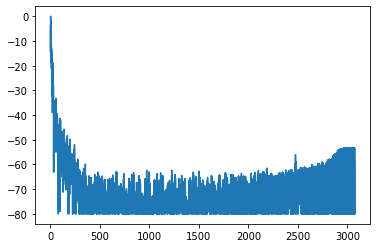

In [5]:
D = librosa.amplitude_to_db(librosa.stft(y[:1024]), ref=np.max)
plt.plot(D.flatten())
plt.show()

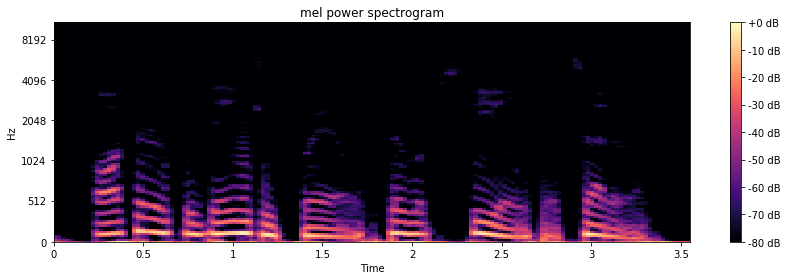

In [8]:
# MFCC 수행
S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128) 
 
log_S = librosa.amplitude_to_db(S, ref=np.max)
plt.figure(figsize=(12, 4))
librosa.display.specshow(log_S, sr=sr, x_axis='time', y_axis='mel')
plt.title('mel power spectrogram')
plt.colorbar(format='%+02.0f dB')
plt.tight_layout()
plt.show()

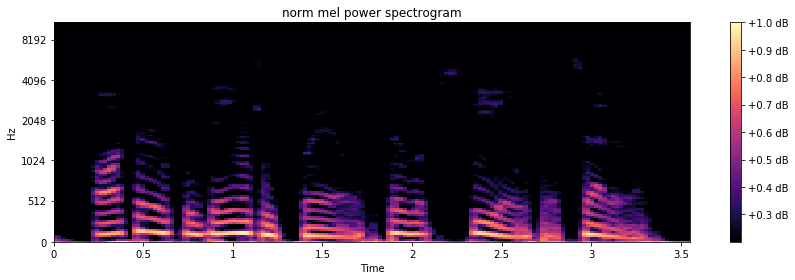

In [9]:
# Normalization

min_level_db = -100

def _normalize(S):
    return np.clip((S - min_level_db) / -min_level_db, 0, 1) # 범위제한

norm_S = _normalize(log_S)

plt.figure(figsize=(12, 4))
librosa.display.specshow(norm_S, sr=sr, x_axis='time', y_axis='mel')
plt.title('norm mel power spectrogram')
plt.colorbar(format='%+0.1f dB')
plt.tight_layout()
plt.show()

In [15]:
import hgtk
 
ori_sent = '람쥐썬더'
jamo_sent = hgtk.text.decompose(ori_sent)
jamo_sent = jamo_sent.replace('ᴥ', '')
print(jamo_sent)

ㄹㅏㅁㅈㅟㅆㅓㄴㄷㅓ
